In [1]:
# Import required libraries
%pip install optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import optuna
import random

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Set constant seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/shreyasshah/Desktop/Fall_2025/STA 221/ecs221/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Downgrade numpy for TensorFlow compatibility (run this cell and restart kernel)
%pip install numpy==1.26.4


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load dataset and select top 14 features
features = [
    'RiskScore', 'MonthlyCharges', 'AvgChargesPerMonth', 'ContractRisk', 'Contract',
    'TotalServices', 'TotalCharges', 'EstimatedCLV', 'HasFamily', 'tenure',
    'Partner', 'HighValueCustomer', 'PaymentRisk', 'Dependents'
]
df = pd.read_csv('final_telco_engineered.csv')
X = df[features]
# Assuming target column is 'Churn' (update if different)
y = df['Churn']

In [4]:
# Identify categorical and numerical columns for preprocessing
categorical_cols = ['Contract', 'HasFamily', 'Partner', 'HighValueCustomer', 'Dependents']
numerical_cols = [col for col in features if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [5]:
# Train/validation/test split (80/10/10)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=SEED, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=SEED, stratify=y_temp)
# 0.1111 * 0.90 ≈ 0.10

In [6]:
# Ensure target variable is numeric (0/1)
if y_train.dtype == 'O' or y_train.dtype.name == 'category':
    y_train = y_train.map({'No': 0, 'Yes': 1}).astype(int)
    y_val = y_val.map({'No': 0, 'Yes': 1}).astype(int)
    y_test = y_test.map({'No': 0, 'Yes': 1}).astype(int)

In [7]:
# Fit preprocessor and transform data
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)
X_test_proc = preprocessor.transform(X_test)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/shreyasshah/Desktop/Fall_2025/STA 221/ecs221/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[I 2025-11-20 23:09:33,205] A new study created in memory with name: no-name-37485ee4-2903-4c2d-95db-5ebd75127415
  0%|          | 0/50 [00:00<?, ?it/s]2025-11-20 23:09:33.237919: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-20 23:09:33.238123: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-20 23:09:33.238146: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-20 23:09:33.238637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-20 23

[I 2025-11-20 23:09:44,725] Trial 0 finished with value: 0.16028332710266113 and parameters: {'n_units': 58, 'lr': 0.007969454818643935, 'dropout': 0.36599697090570255, 'batch_size': 90}. Best is trial 0 with value: 0.16028332710266113.


Best trial: 0. Best value: 0.160283:   4%|▍         | 2/50 [00:35<15:18, 19.14s/it]

[I 2025-11-20 23:10:09,205] Trial 1 finished with value: 0.16168206930160522 and parameters: {'n_units': 33, 'lr': 0.00020511104188433984, 'dropout': 0.02904180608409973, 'batch_size': 116}. Best is trial 0 with value: 0.16028332710266113.


Best trial: 2. Best value: 0.158456:   6%|▌         | 3/50 [00:44<11:19, 14.46s/it]

[I 2025-11-20 23:10:18,093] Trial 2 finished with value: 0.15845602750778198 and parameters: {'n_units': 83, 'lr': 0.0026070247583707684, 'dropout': 0.010292247147901223, 'batch_size': 126}. Best is trial 2 with value: 0.15845602750778198.


Best trial: 3. Best value: 0.157775:   8%|▊         | 4/50 [01:33<21:27, 27.99s/it]

[I 2025-11-20 23:11:06,826] Trial 3 finished with value: 0.15777456760406494 and parameters: {'n_units': 110, 'lr': 0.00026587543983272726, 'dropout': 0.09091248360355031, 'batch_size': 49}. Best is trial 3 with value: 0.15777456760406494.


Best trial: 3. Best value: 0.157775:  10%|█         | 5/50 [01:56<19:43, 26.29s/it]

[I 2025-11-20 23:11:30,110] Trial 4 finished with value: 0.15839922428131104 and parameters: {'n_units': 50, 'lr': 0.0011207606211860567, 'dropout': 0.21597250932105788, 'batch_size': 60}. Best is trial 3 with value: 0.15777456760406494.


Best trial: 5. Best value: 0.157078:  12%|█▏        | 6/50 [02:34<22:11, 30.26s/it]

[I 2025-11-20 23:12:08,078] Trial 5 finished with value: 0.15707778930664062 and parameters: {'n_units': 85, 'lr': 0.00019010245319870352, 'dropout': 0.14607232426760908, 'batch_size': 67}. Best is trial 5 with value: 0.15707778930664062.


Best trial: 5. Best value: 0.157078:  14%|█▍        | 7/50 [02:52<18:37, 25.99s/it]

[I 2025-11-20 23:12:25,283] Trial 6 finished with value: 0.15824437141418457 and parameters: {'n_units': 67, 'lr': 0.0037183641805732083, 'dropout': 0.09983689107917987, 'batch_size': 81}. Best is trial 5 with value: 0.15707778930664062.


Best trial: 5. Best value: 0.157078:  16%|█▌        | 8/50 [03:42<23:32, 33.63s/it]

[I 2025-11-20 23:13:15,276] Trial 7 finished with value: 0.16076332330703735 and parameters: {'n_units': 82, 'lr': 0.0001238513729886094, 'dropout': 0.3037724259507192, 'batch_size': 48}. Best is trial 5 with value: 0.15707778930664062.


Best trial: 5. Best value: 0.157078:  18%|█▊        | 9/50 [03:50<17:35, 25.75s/it]

[I 2025-11-20 23:13:23,696] Trial 8 finished with value: 0.16168212890625 and parameters: {'n_units': 23, 'lr': 0.007902619549708232, 'dropout': 0.4828160165372797, 'batch_size': 110}. Best is trial 5 with value: 0.15707778930664062.


Best trial: 5. Best value: 0.157078:  20%|██        | 10/50 [04:29<19:52, 29.81s/it]

[I 2025-11-20 23:14:02,598] Trial 9 finished with value: 0.16011297702789307 and parameters: {'n_units': 50, 'lr': 0.0001567993391672301, 'dropout': 0.34211651325607845, 'batch_size': 74}. Best is trial 5 with value: 0.15707778930664062.


Best trial: 5. Best value: 0.157078:  22%|██▏       | 11/50 [05:41<27:41, 42.61s/it]

[I 2025-11-20 23:15:14,244] Trial 10 finished with value: 0.15811020135879517 and parameters: {'n_units': 124, 'lr': 0.0005338943774556114, 'dropout': 0.18626884362117777, 'batch_size': 33}. Best is trial 5 with value: 0.15707778930664062.


Best trial: 5. Best value: 0.157078:  24%|██▍       | 12/50 [06:12<24:53, 39.31s/it]

[I 2025-11-20 23:15:46,005] Trial 11 finished with value: 0.15807920694351196 and parameters: {'n_units': 109, 'lr': 0.00039914403752583567, 'dropout': 0.12772172938259946, 'batch_size': 56}. Best is trial 5 with value: 0.15707778930664062.


Best trial: 12. Best value: 0.157021:  26%|██▌       | 13/50 [06:58<25:25, 41.23s/it]

[I 2025-11-20 23:16:31,650] Trial 12 finished with value: 0.15702104568481445 and parameters: {'n_units': 100, 'lr': 0.0003588371878034117, 'dropout': 0.10784400702053297, 'batch_size': 32}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  28%|██▊       | 14/50 [07:26<22:20, 37.24s/it]

[I 2025-11-20 23:16:59,677] Trial 13 finished with value: 0.15779012441635132 and parameters: {'n_units': 95, 'lr': 0.000739115897463125, 'dropout': 0.16009854358660752, 'batch_size': 33}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  30%|███       | 15/50 [07:55<20:12, 34.65s/it]

[I 2025-11-20 23:17:28,317] Trial 14 finished with value: 0.1598600149154663 and parameters: {'n_units': 97, 'lr': 0.0001060568703503723, 'dropout': 0.26919894651828646, 'batch_size': 94}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  32%|███▏      | 16/50 [08:20<18:08, 32.01s/it]

[I 2025-11-20 23:17:54,189] Trial 15 finished with value: 0.15862631797790527 and parameters: {'n_units': 79, 'lr': 0.0013614786740569432, 'dropout': 0.07172480710570282, 'batch_size': 68}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  34%|███▍      | 17/50 [08:58<18:26, 33.53s/it]

[I 2025-11-20 23:18:31,256] Trial 16 finished with value: 0.15826499462127686 and parameters: {'n_units': 126, 'lr': 0.0003124475695871246, 'dropout': 0.22099143305813995, 'batch_size': 43}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  36%|███▌      | 18/50 [09:18<15:47, 29.62s/it]

[I 2025-11-20 23:18:51,784] Trial 17 finished with value: 0.1582702398300171 and parameters: {'n_units': 91, 'lr': 0.0006270269664724167, 'dropout': 0.13618935798612516, 'batch_size': 62}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  38%|███▊      | 19/50 [09:46<15:02, 29.12s/it]

[I 2025-11-20 23:19:19,746] Trial 18 finished with value: 0.1572895050048828 and parameters: {'n_units': 108, 'lr': 0.0003833703396940565, 'dropout': 0.050922737475892196, 'batch_size': 98}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  40%|████      | 20/50 [10:19<15:12, 30.40s/it]

[I 2025-11-20 23:19:53,127] Trial 19 finished with value: 0.16057229042053223 and parameters: {'n_units': 70, 'lr': 0.00019209789504021378, 'dropout': 0.4270627421637062, 'batch_size': 79}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  42%|████▏     | 21/50 [10:39<13:04, 27.04s/it]

[I 2025-11-20 23:20:12,326] Trial 20 finished with value: 0.15798115730285645 and parameters: {'n_units': 103, 'lr': 0.0017705020558054744, 'dropout': 0.1800234279673208, 'batch_size': 40}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  44%|████▍     | 22/50 [11:03<12:11, 26.12s/it]

[I 2025-11-20 23:20:36,295] Trial 21 finished with value: 0.15715521574020386 and parameters: {'n_units': 115, 'lr': 0.0003557328681085839, 'dropout': 0.06830747035734108, 'batch_size': 100}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  46%|████▌     | 23/50 [11:29<11:45, 26.15s/it]

[I 2025-11-20 23:21:02,510] Trial 22 finished with value: 0.15752685070037842 and parameters: {'n_units': 115, 'lr': 0.0002586301827388239, 'dropout': 0.10826251317340031, 'batch_size': 102}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  48%|████▊     | 24/50 [11:55<11:19, 26.12s/it]

[I 2025-11-20 23:21:28,571] Trial 23 finished with value: 0.15817725658416748 and parameters: {'n_units': 118, 'lr': 0.0004961274285699725, 'dropout': 0.0010359058384997732, 'batch_size': 107}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  50%|█████     | 25/50 [12:18<10:28, 25.13s/it]

[I 2025-11-20 23:21:51,387] Trial 24 finished with value: 0.15805339813232422 and parameters: {'n_units': 90, 'lr': 0.000785974728314471, 'dropout': 0.05066515165687702, 'batch_size': 87}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  52%|█████▏    | 26/50 [12:56<11:39, 29.13s/it]

[I 2025-11-20 23:22:29,861] Trial 25 finished with value: 0.15915799140930176 and parameters: {'n_units': 99, 'lr': 0.00018200360854254085, 'dropout': 0.15203866776968245, 'batch_size': 68}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  54%|█████▍    | 27/50 [13:28<11:27, 29.91s/it]

[I 2025-11-20 23:23:01,593] Trial 26 finished with value: 0.1584714651107788 and parameters: {'n_units': 116, 'lr': 0.0003558852611448763, 'dropout': 0.25150335484031106, 'batch_size': 87}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  56%|█████▌    | 28/50 [13:52<10:20, 28.19s/it]

[I 2025-11-20 23:23:25,760] Trial 27 finished with value: 0.1597825288772583 and parameters: {'n_units': 76, 'lr': 0.00013944070163050557, 'dropout': 0.06658913982353742, 'batch_size': 121}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  58%|█████▊    | 29/50 [14:39<11:49, 33.79s/it]

[I 2025-11-20 23:24:12,633] Trial 28 finished with value: 0.15876054763793945 and parameters: {'n_units': 87, 'lr': 0.0002456777215807603, 'dropout': 0.21628525490573652, 'batch_size': 54}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  60%|██████    | 30/50 [14:58<09:45, 29.28s/it]

[I 2025-11-20 23:24:31,372] Trial 29 finished with value: 0.1587863564491272 and parameters: {'n_units': 102, 'lr': 0.0009181355964932989, 'dropout': 0.11769297953681375, 'batch_size': 91}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  62%|██████▏   | 31/50 [15:25<09:02, 28.57s/it]

[I 2025-11-20 23:24:58,301] Trial 30 finished with value: 0.1575579047203064 and parameters: {'n_units': 61, 'lr': 0.00045829482553016407, 'dropout': 0.1781103397726133, 'batch_size': 106}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  64%|██████▍   | 32/50 [15:49<08:10, 27.22s/it]

[I 2025-11-20 23:25:22,379] Trial 31 finished with value: 0.15854895114898682 and parameters: {'n_units': 107, 'lr': 0.00037314695799436307, 'dropout': 0.05043961491799204, 'batch_size': 98}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  66%|██████▌   | 33/50 [16:18<07:53, 27.86s/it]

[I 2025-11-20 23:25:51,711] Trial 32 finished with value: 0.15779012441635132 and parameters: {'n_units': 128, 'lr': 0.00028719219669222205, 'dropout': 0.03652282173690505, 'batch_size': 98}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  68%|██████▊   | 34/50 [16:44<07:14, 27.17s/it]

[I 2025-11-20 23:26:17,266] Trial 33 finished with value: 0.15779531002044678 and parameters: {'n_units': 120, 'lr': 0.00022983192480228144, 'dropout': 0.08449339574672876, 'batch_size': 114}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  70%|███████   | 35/50 [17:09<06:39, 26.66s/it]

[I 2025-11-20 23:26:42,752] Trial 34 finished with value: 0.15821337699890137 and parameters: {'n_units': 110, 'lr': 0.0001755899324194136, 'dropout': 0.025024286015993186, 'batch_size': 117}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  72%|███████▏  | 36/50 [17:42<06:41, 28.69s/it]

[I 2025-11-20 23:27:16,177] Trial 35 finished with value: 0.15849733352661133 and parameters: {'n_units': 94, 'lr': 0.00054954229550761, 'dropout': 0.08807130872192459, 'batch_size': 82}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  74%|███████▍  | 37/50 [18:07<05:58, 27.57s/it]

[I 2025-11-20 23:27:41,120] Trial 36 finished with value: 0.158203125 and parameters: {'n_units': 105, 'lr': 0.00032755659801978203, 'dropout': 0.02102953843474275, 'batch_size': 124}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  76%|███████▌  | 38/50 [18:36<05:35, 27.92s/it]

[I 2025-11-20 23:28:09,854] Trial 37 finished with value: 0.1573101282119751 and parameters: {'n_units': 85, 'lr': 0.00020844963435315446, 'dropout': 0.14513784700049692, 'batch_size': 99}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  78%|███████▊  | 39/50 [19:13<05:38, 30.74s/it]

[I 2025-11-20 23:28:47,165] Trial 38 finished with value: 0.15958642959594727 and parameters: {'n_units': 112, 'lr': 0.00011482777305230746, 'dropout': 0.06045094181899047, 'batch_size': 72}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  80%|████████  | 40/50 [19:32<04:29, 26.98s/it]

[I 2025-11-20 23:29:05,372] Trial 39 finished with value: 0.15976715087890625 and parameters: {'n_units': 99, 'lr': 0.001379783512975273, 'dropout': 0.10566901606323531, 'batch_size': 94}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  82%|████████▏ | 41/50 [19:46<03:29, 23.23s/it]

[I 2025-11-20 23:29:19,852] Trial 40 finished with value: 0.15840953588485718 and parameters: {'n_units': 73, 'lr': 0.005409652258843025, 'dropout': 0.20211002098646452, 'batch_size': 113}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  84%|████████▍ | 42/50 [20:15<03:19, 24.94s/it]

[I 2025-11-20 23:29:48,801] Trial 41 finished with value: 0.15724295377731323 and parameters: {'n_units': 85, 'lr': 0.00021980975837992484, 'dropout': 0.1512605357383, 'batch_size': 99}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  86%|████████▌ | 43/50 [20:45<03:04, 26.31s/it]

[I 2025-11-20 23:30:18,305] Trial 42 finished with value: 0.1603761911392212 and parameters: {'n_units': 82, 'lr': 0.00014141632804077502, 'dropout': 0.12379148138232135, 'batch_size': 102}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  88%|████████▊ | 44/50 [21:18<02:50, 28.50s/it]

[I 2025-11-20 23:30:51,895] Trial 43 finished with value: 0.1615530252456665 and parameters: {'n_units': 19, 'lr': 0.00043371394021949114, 'dropout': 0.16792270545545215, 'batch_size': 84}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  90%|█████████ | 45/50 [21:42<02:15, 27.14s/it]

[I 2025-11-20 23:31:15,872] Trial 44 finished with value: 0.15811532735824585 and parameters: {'n_units': 62, 'lr': 0.0006373403172628985, 'dropout': 0.07826562546764074, 'batch_size': 78}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  92%|█████████▏| 46/50 [22:10<01:48, 27.22s/it]

[I 2025-11-20 23:31:43,287] Trial 45 finished with value: 0.16011810302734375 and parameters: {'n_units': 51, 'lr': 0.0002848573994502198, 'dropout': 0.2861018138981589, 'batch_size': 108}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  94%|█████████▍| 47/50 [22:40<01:24, 28.26s/it]

[I 2025-11-20 23:32:13,983] Trial 46 finished with value: 0.16186797618865967 and parameters: {'n_units': 91, 'lr': 0.00010012078005753865, 'dropout': 0.3288532787998742, 'batch_size': 93}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  96%|█████████▌| 48/50 [23:45<01:18, 39.12s/it]

[I 2025-11-20 23:33:18,446] Trial 47 finished with value: 0.15924060344696045 and parameters: {'n_units': 31, 'lr': 0.00016080387593293526, 'dropout': 0.10087782383324152, 'batch_size': 39}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021:  98%|█████████▊| 49/50 [24:34<00:42, 42.05s/it]

[I 2025-11-20 23:34:07,337] Trial 48 finished with value: 0.15821856260299683 and parameters: {'n_units': 80, 'lr': 0.00023183966418305248, 'dropout': 0.03965912671652288, 'batch_size': 52}. Best is trial 12 with value: 0.15702104568481445.


Best trial: 12. Best value: 0.157021: 100%|██████████| 50/50 [25:16<00:00, 30.33s/it]


[I 2025-11-20 23:34:49,833] Trial 49 finished with value: 0.15845084190368652 and parameters: {'n_units': 87, 'lr': 0.00039251337811376793, 'dropout': 0.13995968170534775, 'batch_size': 59}. Best is trial 12 with value: 0.15702104568481445.
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
FNN Test Results:
Accuracy: 0.7376
F1 Score: 0.6170
Precision: 0.5034
Recall (Sensitivity): 0.7968
Specificity: 0.7162
AUC: 0.8375


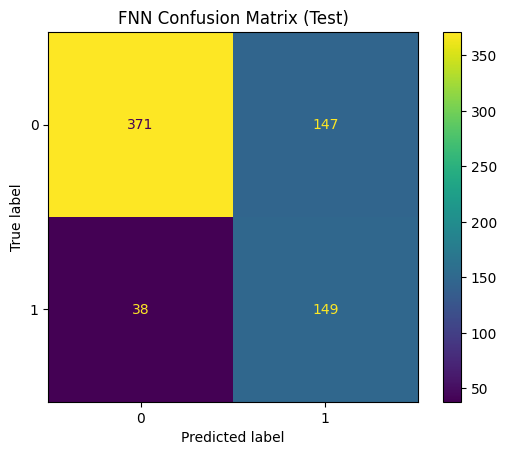

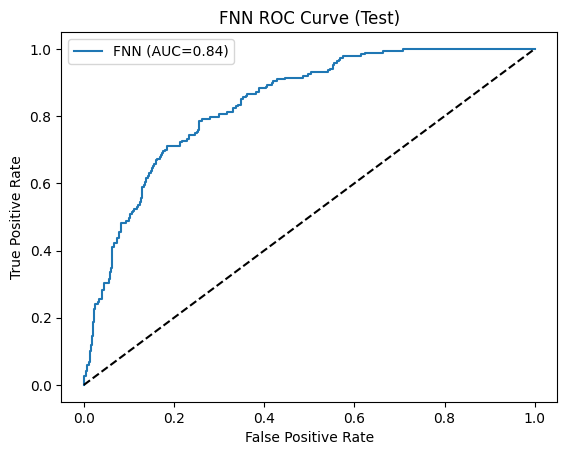

: 

In [ ]:
# Feed Forward Neural Network (FNN) with Optuna hyperparameter tuning
%pip install tensorflow-macos tensorflow-metal
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Set TensorFlow seeds for reproducibility
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)

# Compute class weights for imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

def create_fnn_model(trial):
    n_units = trial.suggest_int('n_units', 16, 128)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    model = models.Sequential([
        layers.Input(shape=(X_train_proc.shape[1],)),
        layers.Dense(n_units, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(1, activation='sigmoid')
    ])
    optimizer = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss=losses.BinaryCrossentropy(), metrics=['accuracy', metrics.F1Score(name='f1')])
    return model

def objective_fnn(trial):
    # Set seeds for each trial
    tf.random.set_seed(SEED)
    tf.keras.utils.set_random_seed(SEED)
    
    model = create_fnn_model(trial)
    early_stop = EarlyStopping(monitor='val_f1', patience=5, mode='max', restore_best_weights=True)
    history = model.fit(
        X_train_proc, y_train,
        validation_data=(X_val_proc, y_val),
        epochs=30,
        batch_size=trial.suggest_int('batch_size', 32, 128),
        verbose=0,
        class_weight=class_weight_dict,
        callbacks=[early_stop]
    )
    val_f1 = max(history.history.get('val_f1', [0]))
    return val_f1  # Optuna maximizes

study_fnn = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=SEED))
study_fnn.optimize(objective_fnn, n_trials=50, show_progress_bar=True)

# Train best FNN model
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)

best_params_fnn = study_fnn.best_params
best_fnn = create_fnn_model(optuna.trial.FixedTrial(best_params_fnn))
early_stop_final = EarlyStopping(monitor='val_f1', patience=5, mode='max', restore_best_weights=True)
best_fnn.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=30,
    batch_size=best_params_fnn['batch_size'],
    verbose=0,
    class_weight=class_weight_dict,
    callbacks=[early_stop_final]
)
# Evaluate on test set
pred_test_fnn = best_fnn.predict(X_test_proc).ravel()
pred_test_label_fnn = (pred_test_fnn > 0.5).astype(int)
cm_fnn = confusion_matrix(y_test, pred_test_label_fnn)
roc_auc_fnn = roc_auc_score(y_test, pred_test_fnn)
f1_fnn = f1_score(y_test, pred_test_label_fnn)
precision_fnn = precision_score(y_test, pred_test_label_fnn)
recall_fnn = recall_score(y_test, pred_test_label_fnn)
specificity_fnn = cm_fnn[0,0] / (cm_fnn[0,0] + cm_fnn[0,1]) if (cm_fnn[0,0] + cm_fnn[0,1]) > 0 else 0
accuracy_fnn = (cm_fnn[0,0] + cm_fnn[1,1]) / cm_fnn.sum()

print('FNN Test Results:')
print(f'Accuracy: {accuracy_fnn:.4f}')
print(f'F1 Score: {f1_fnn:.4f}')
print(f'Precision: {precision_fnn:.4f}')
print(f'Recall (Sensitivity): {recall_fnn:.4f}')
print(f'Specificity: {specificity_fnn:.4f}')
print(f'AUC: {roc_auc_fnn:.4f}')

# Plot Confusion Matrix (Test)
ConfusionMatrixDisplay(cm_fnn).plot()
plt.title('FNN Confusion Matrix (Test)')
plt.show()

# Plot ROC Curve (Test)
fpr_fnn, tpr_fnn, _ = roc_curve(y_test, pred_test_fnn)
plt.figure()
plt.plot(fpr_fnn, tpr_fnn, label=f'FNN (AUC={roc_auc_fnn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN ROC Curve (Test)')
plt.legend()
plt.show()

[I 2025-11-21 10:53:08,679] A new study created in memory with name: no-name-1c98c7c4-f7f6-4ab0-a410-58a424cdd62b
Best trial: 0. Best value: 0.163169:   2%|▏         | 1/50 [00:21<17:16, 21.16s/it]

[I 2025-11-21 10:53:29,840] Trial 0 finished with value: 0.16316866874694824 and parameters: {'n_layers': 3, 'n_units': 124, 'lr': 0.0029106359131330704, 'dropout': 0.2993292420985183, 'batch_size': 47}. Best is trial 0 with value: 0.16316866874694824.


Best trial: 1. Best value: 0.159447:   4%|▍         | 2/50 [00:42<17:03, 21.32s/it]

[I 2025-11-21 10:53:51,263] Trial 1 finished with value: 0.1594470739364624 and parameters: {'n_layers': 2, 'n_units': 37, 'lr': 0.005399484409787433, 'dropout': 0.3005575058716044, 'batch_size': 100}. Best is trial 1 with value: 0.1594470739364624.


Best trial: 1. Best value: 0.159447:   6%|▌         | 3/50 [01:09<18:44, 23.94s/it]

[I 2025-11-21 10:54:18,316] Trial 2 finished with value: 0.16046911478042603 and parameters: {'n_layers': 2, 'n_units': 126, 'lr': 0.004622589001020831, 'dropout': 0.10616955533913808, 'batch_size': 49}. Best is trial 1 with value: 0.1594470739364624.


Best trial: 1. Best value: 0.159447:   8%|▊         | 4/50 [01:24<15:43, 20.52s/it]

[I 2025-11-21 10:54:33,593] Trial 3 finished with value: 0.16051554679870605 and parameters: {'n_layers': 2, 'n_units': 61, 'lr': 0.0011207606211860567, 'dropout': 0.21597250932105788, 'batch_size': 60}. Best is trial 1 with value: 0.1594470739364624.


Best trial: 1. Best value: 0.159447:  10%|█         | 5/50 [02:04<20:31, 27.38s/it]

[I 2025-11-21 10:55:13,130] Trial 4 finished with value: 0.15973615646362305 and parameters: {'n_layers': 3, 'n_units': 45, 'lr': 0.0003839629299804173, 'dropout': 0.18318092164684585, 'batch_size': 76}. Best is trial 1 with value: 0.1594470739364624.


Best trial: 1. Best value: 0.159447:  12%|█▏        | 6/50 [03:23<32:56, 44.91s/it]

[I 2025-11-21 10:56:32,076] Trial 5 finished with value: 0.1629105806350708 and parameters: {'n_layers': 4, 'n_units': 51, 'lr': 0.0010677482709481358, 'dropout': 0.29620728443102123, 'batch_size': 36}. Best is trial 1 with value: 0.1594470739364624.


Best trial: 1. Best value: 0.159447:  14%|█▍        | 7/50 [03:54<28:58, 40.42s/it]

[I 2025-11-21 10:57:03,263] Trial 6 finished with value: 0.16631734371185303 and parameters: {'n_layers': 3, 'n_units': 48, 'lr': 0.00013492834268013249, 'dropout': 0.4744427686266666, 'batch_size': 125}. Best is trial 1 with value: 0.1594470739364624.


Best trial: 1. Best value: 0.159447:  16%|█▌        | 8/50 [04:47<31:08, 44.49s/it]

[I 2025-11-21 10:57:56,465] Trial 7 finished with value: 0.16506308317184448 and parameters: {'n_layers': 4, 'n_units': 61, 'lr': 0.0001567993391672301, 'dropout': 0.34211651325607845, 'batch_size': 74}. Best is trial 1 with value: 0.1594470739364624.


Best trial: 1. Best value: 0.159447:  18%|█▊        | 9/50 [05:32<30:30, 44.64s/it]

[I 2025-11-21 10:58:41,433] Trial 8 finished with value: 0.1599787473678589 and parameters: {'n_layers': 2, 'n_units': 80, 'lr': 0.00011715937392307068, 'dropout': 0.45466020103939103, 'batch_size': 57}. Best is trial 1 with value: 0.1594470739364624.


Best trial: 1. Best value: 0.159447:  20%|██        | 10/50 [05:54<24:57, 37.43s/it]

[I 2025-11-21 10:59:02,707] Trial 9 finished with value: 0.1603090763092041 and parameters: {'n_layers': 3, 'n_units': 62, 'lr': 0.001096821720752952, 'dropout': 0.2733551396716398, 'batch_size': 49}. Best is trial 1 with value: 0.1594470739364624.


Best trial: 10. Best value: 0.157806:  22%|██▏       | 11/50 [06:05<19:09, 29.46s/it]

[I 2025-11-21 10:59:14,118] Trial 10 finished with value: 0.1578056812286377 and parameters: {'n_layers': 2, 'n_units': 32, 'lr': 0.008691089486124988, 'dropout': 0.0089809378074098, 'batch_size': 112}. Best is trial 10 with value: 0.1578056812286377.


Best trial: 10. Best value: 0.157806:  24%|██▍       | 12/50 [06:17<15:19, 24.19s/it]

[I 2025-11-21 10:59:26,231] Trial 11 finished with value: 0.15929222106933594 and parameters: {'n_layers': 2, 'n_units': 33, 'lr': 0.009112136566735868, 'dropout': 0.04279253420399439, 'batch_size': 105}. Best is trial 10 with value: 0.1578056812286377.


Best trial: 10. Best value: 0.157806:  26%|██▌       | 13/50 [06:28<12:25, 20.14s/it]

[I 2025-11-21 10:59:37,062] Trial 12 finished with value: 0.15909093618392944 and parameters: {'n_layers': 2, 'n_units': 32, 'lr': 0.008854860351053073, 'dropout': 0.016870583760315278, 'batch_size': 106}. Best is trial 10 with value: 0.1578056812286377.


Best trial: 10. Best value: 0.157806:  28%|██▊       | 14/50 [06:37<10:03, 16.77s/it]

[I 2025-11-21 10:59:46,045] Trial 13 finished with value: 0.1629570722579956 and parameters: {'n_layers': 2, 'n_units': 98, 'lr': 0.009950965602670201, 'dropout': 0.0021577654211222524, 'batch_size': 108}. Best is trial 10 with value: 0.1578056812286377.


Best trial: 10. Best value: 0.157806:  30%|███       | 15/50 [06:45<08:18, 14.23s/it]

[I 2025-11-21 10:59:54,392] Trial 14 finished with value: 0.16127431392669678 and parameters: {'n_layers': 2, 'n_units': 83, 'lr': 0.0024502252818992157, 'dropout': 0.10150361598247624, 'batch_size': 127}. Best is trial 10 with value: 0.1578056812286377.


Best trial: 10. Best value: 0.157806:  32%|███▏      | 16/50 [07:03<08:44, 15.44s/it]

[I 2025-11-21 11:00:12,636] Trial 15 finished with value: 0.16061878204345703 and parameters: {'n_layers': 3, 'n_units': 32, 'lr': 0.0023402723404797286, 'dropout': 0.11974988595503126, 'batch_size': 94}. Best is trial 10 with value: 0.1578056812286377.


Best trial: 10. Best value: 0.157806:  34%|███▍      | 17/50 [07:12<07:24, 13.47s/it]

[I 2025-11-21 11:00:21,518] Trial 16 finished with value: 0.15844058990478516 and parameters: {'n_layers': 2, 'n_units': 80, 'lr': 0.0054549032497315094, 'dropout': 0.009968750777852937, 'batch_size': 115}. Best is trial 10 with value: 0.1578056812286377.


Best trial: 10. Best value: 0.157806:  36%|███▌      | 18/50 [07:24<06:52, 12.89s/it]

[I 2025-11-21 11:00:33,059] Trial 17 finished with value: 0.165718674659729 and parameters: {'n_layers': 4, 'n_units': 106, 'lr': 0.004885343089238245, 'dropout': 0.06940641877629392, 'batch_size': 117}. Best is trial 10 with value: 0.1578056812286377.


Best trial: 18. Best value: 0.15731:  38%|███▊      | 19/50 [07:59<10:04, 19.49s/it] 

[I 2025-11-21 11:01:07,920] Trial 18 finished with value: 0.15731006860733032 and parameters: {'n_layers': 2, 'n_units': 76, 'lr': 0.0005118817910169077, 'dropout': 0.1627473747821603, 'batch_size': 88}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  40%|████      | 20/50 [08:16<09:23, 18.80s/it]

[I 2025-11-21 11:01:25,107] Trial 19 finished with value: 0.15960192680358887 and parameters: {'n_layers': 3, 'n_units': 96, 'lr': 0.00039376883653304527, 'dropout': 0.17377799493147403, 'batch_size': 92}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  42%|████▏     | 21/50 [08:56<12:11, 25.23s/it]

[I 2025-11-21 11:02:05,340] Trial 20 finished with value: 0.15888440608978271 and parameters: {'n_layers': 2, 'n_units': 69, 'lr': 0.00040972127413567015, 'dropout': 0.38556760714382726, 'batch_size': 84}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  44%|████▍     | 22/50 [09:12<10:23, 22.28s/it]

[I 2025-11-21 11:02:20,731] Trial 21 finished with value: 0.16008198261260986 and parameters: {'n_layers': 2, 'n_units': 73, 'lr': 0.0005835914895561368, 'dropout': 0.14136579454061454, 'batch_size': 115}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  46%|████▌     | 23/50 [09:22<08:23, 18.66s/it]

[I 2025-11-21 11:02:30,954] Trial 22 finished with value: 0.16090267896652222 and parameters: {'n_layers': 2, 'n_units': 92, 'lr': 0.00170152803675641, 'dropout': 0.060736508455147886, 'batch_size': 116}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  48%|████▊     | 24/50 [09:52<09:36, 22.18s/it]

[I 2025-11-21 11:03:01,332] Trial 23 finished with value: 0.15803277492523193 and parameters: {'n_layers': 2, 'n_units': 110, 'lr': 0.00021676924969772372, 'dropout': 0.2180499167861401, 'batch_size': 85}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  50%|█████     | 25/50 [10:23<10:16, 24.67s/it]

[I 2025-11-21 11:03:31,823] Trial 24 finished with value: 0.1580430269241333 and parameters: {'n_layers': 2, 'n_units': 110, 'lr': 0.00020901615681563016, 'dropout': 0.23428260646579258, 'batch_size': 85}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  52%|█████▏    | 26/50 [10:39<08:52, 22.21s/it]

[I 2025-11-21 11:03:48,281] Trial 25 finished with value: 0.15976709127426147 and parameters: {'n_layers': 3, 'n_units': 115, 'lr': 0.00024874637949244554, 'dropout': 0.17629643028767228, 'batch_size': 68}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  54%|█████▍    | 27/50 [10:53<07:34, 19.75s/it]

[I 2025-11-21 11:04:02,286] Trial 26 finished with value: 0.16052591800689697 and parameters: {'n_layers': 2, 'n_units': 90, 'lr': 0.0006445254388275861, 'dropout': 0.21363969484651527, 'batch_size': 93}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  56%|█████▌    | 28/50 [11:10<06:55, 18.89s/it]

[I 2025-11-21 11:04:19,169] Trial 27 finished with value: 0.158605694770813 and parameters: {'n_layers': 2, 'n_units': 103, 'lr': 0.0002560742873284924, 'dropout': 0.14833728865230167, 'batch_size': 85}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  58%|█████▊    | 29/50 [11:38<07:33, 21.58s/it]

[I 2025-11-21 11:04:47,022] Trial 28 finished with value: 0.1574597954750061 and parameters: {'n_layers': 3, 'n_units': 55, 'lr': 0.0006814866452004796, 'dropout': 0.36376863133920795, 'batch_size': 67}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  60%|██████    | 30/50 [12:09<08:10, 24.53s/it]

[I 2025-11-21 11:05:18,431] Trial 29 finished with value: 0.16369521617889404 and parameters: {'n_layers': 4, 'n_units': 54, 'lr': 0.0007035871636888188, 'dropout': 0.403291356574368, 'batch_size': 67}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  62%|██████▏   | 31/50 [12:43<08:38, 27.27s/it]

[I 2025-11-21 11:05:52,103] Trial 30 finished with value: 0.16018009185791016 and parameters: {'n_layers': 3, 'n_units': 42, 'lr': 0.00133058936512249, 'dropout': 0.3501439166248972, 'batch_size': 59}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  64%|██████▍   | 32/50 [13:10<08:12, 27.34s/it]

[I 2025-11-21 11:06:19,594] Trial 31 finished with value: 0.15956580638885498 and parameters: {'n_layers': 3, 'n_units': 69, 'lr': 0.000737666759373376, 'dropout': 0.281917947976836, 'batch_size': 78}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  66%|██████▌   | 33/50 [13:28<06:54, 24.37s/it]

[I 2025-11-21 11:06:37,048] Trial 32 finished with value: 0.15965873003005981 and parameters: {'n_layers': 2, 'n_units': 116, 'lr': 0.0004812021797462009, 'dropout': 0.25367166114857853, 'batch_size': 99}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  68%|██████▊   | 34/50 [14:15<08:20, 31.26s/it]

[I 2025-11-21 11:07:24,395] Trial 33 finished with value: 0.159865140914917 and parameters: {'n_layers': 2, 'n_units': 56, 'lr': 0.0002886359236663817, 'dropout': 0.3339384787302798, 'batch_size': 65}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  70%|███████   | 35/50 [14:57<08:35, 34.34s/it]

[I 2025-11-21 11:08:05,900] Trial 34 finished with value: 0.158125638961792 and parameters: {'n_layers': 3, 'n_units': 41, 'lr': 0.00349724751081156, 'dropout': 0.43354506932948983, 'batch_size': 88}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  72%|███████▏  | 36/50 [15:20<07:15, 31.10s/it]

[I 2025-11-21 11:08:29,444] Trial 35 finished with value: 0.15871405601501465 and parameters: {'n_layers': 2, 'n_units': 126, 'lr': 0.00017395855411337938, 'dropout': 0.31875252942917176, 'batch_size': 99}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  74%|███████▍  | 37/50 [15:35<05:39, 26.13s/it]

[I 2025-11-21 11:08:43,994] Trial 36 finished with value: 0.16036587953567505 and parameters: {'n_layers': 3, 'n_units': 85, 'lr': 0.0008720146124830824, 'dropout': 0.20275686446494398, 'batch_size': 73}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  76%|███████▌  | 38/50 [16:07<05:35, 27.96s/it]

[I 2025-11-21 11:09:16,223] Trial 37 finished with value: 0.16525405645370483 and parameters: {'n_layers': 4, 'n_units': 68, 'lr': 0.0005141524827617847, 'dropout': 0.24982902491355258, 'batch_size': 80}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  78%|███████▊  | 39/50 [17:12<07:10, 39.09s/it]

[I 2025-11-21 11:10:21,293] Trial 38 finished with value: 0.15885865688323975 and parameters: {'n_layers': 2, 'n_units': 46, 'lr': 0.0003371567043948682, 'dropout': 0.09897612811460231, 'batch_size': 34}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  80%|████████  | 40/50 [17:57<06:47, 40.80s/it]

[I 2025-11-21 11:11:06,061] Trial 39 finished with value: 0.16138792037963867 and parameters: {'n_layers': 2, 'n_units': 73, 'lr': 0.00010241506877983353, 'dropout': 0.36549992821367444, 'batch_size': 71}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  82%|████████▏ | 41/50 [18:34<05:57, 39.69s/it]

[I 2025-11-21 11:11:43,166] Trial 40 finished with value: 0.16011810302734375 and parameters: {'n_layers': 3, 'n_units': 57, 'lr': 0.0013842018106753058, 'dropout': 0.48696181110062975, 'batch_size': 53}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  84%|████████▍ | 42/50 [19:05<04:57, 37.22s/it]

[I 2025-11-21 11:12:14,635] Trial 41 finished with value: 0.15915799140930176 and parameters: {'n_layers': 2, 'n_units': 118, 'lr': 0.00020017734847705296, 'dropout': 0.23988466616176685, 'batch_size': 86}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  86%|████████▌ | 43/50 [19:41<04:16, 36.58s/it]

[I 2025-11-21 11:12:49,694] Trial 42 finished with value: 0.15821337699890137 and parameters: {'n_layers': 2, 'n_units': 106, 'lr': 0.00021113191730947887, 'dropout': 0.3095810608772893, 'batch_size': 44}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  88%|████████▊ | 44/50 [20:21<03:46, 37.75s/it]

[I 2025-11-21 11:13:30,188] Trial 43 finished with value: 0.15899282693862915 and parameters: {'n_layers': 2, 'n_units': 111, 'lr': 0.00013714846877543562, 'dropout': 0.2336257588975693, 'batch_size': 81}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  90%|█████████ | 45/50 [20:44<02:46, 33.29s/it]

[I 2025-11-21 11:13:53,080] Trial 44 finished with value: 0.1593334674835205 and parameters: {'n_layers': 2, 'n_units': 120, 'lr': 0.00029022117820084363, 'dropout': 0.27467051961820765, 'batch_size': 89}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  92%|█████████▏| 46/50 [21:04<01:57, 29.27s/it]

[I 2025-11-21 11:14:12,976] Trial 45 finished with value: 0.15827536582946777 and parameters: {'n_layers': 2, 'n_units': 38, 'lr': 0.0008563737704554808, 'dropout': 0.1978085778211022, 'batch_size': 102}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  94%|█████████▍| 47/50 [21:25<01:20, 26.72s/it]

[I 2025-11-21 11:14:33,733] Trial 46 finished with value: 0.15887928009033203 and parameters: {'n_layers': 2, 'n_units': 63, 'lr': 0.0004893607823437164, 'dropout': 0.1589401007627223, 'batch_size': 62}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  96%|█████████▌| 48/50 [21:57<00:57, 28.57s/it]

[I 2025-11-21 11:15:06,609] Trial 47 finished with value: 0.1578882336616516 and parameters: {'n_layers': 2, 'n_units': 112, 'lr': 0.00017084455702197926, 'dropout': 0.13052217894731052, 'batch_size': 77}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731:  98%|█████████▊| 49/50 [22:26<00:28, 28.65s/it]

[I 2025-11-21 11:15:35,455] Trial 48 finished with value: 0.16011816263198853 and parameters: {'n_layers': 4, 'n_units': 75, 'lr': 0.00015696145710294233, 'dropout': 0.12631196555511795, 'batch_size': 77}. Best is trial 18 with value: 0.15731006860733032.


Best trial: 18. Best value: 0.15731: 100%|██████████| 50/50 [23:08<00:00, 27.77s/it]


[I 2025-11-21 11:16:17,406] Trial 49 finished with value: 0.15922510623931885 and parameters: {'n_layers': 2, 'n_units': 51, 'lr': 0.00012397641483549498, 'dropout': 0.07964330544923787, 'batch_size': 73}. Best is trial 18 with value: 0.15731006860733032.
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MLP Test Results:
Accuracy: 0.7348
F1 Score: 0.6160
Precision: 0.5000
Recall (Sensitivity): 0.8021
Specificity: 0.7104
AUC: 0.8370


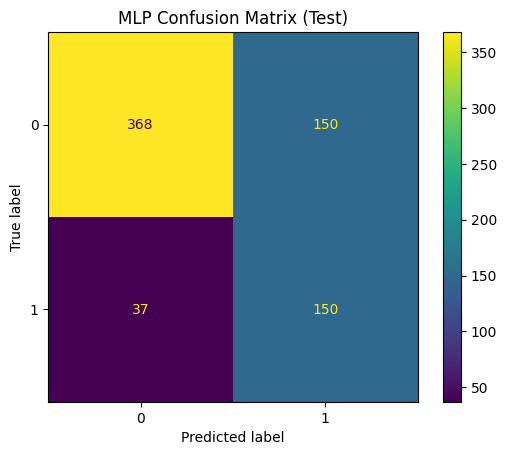

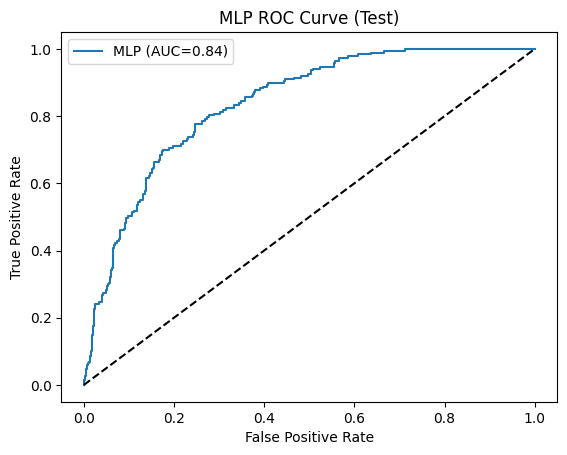

In [ ]:
# Multi-Layer Perceptron (MLP) with Optuna hyperparameter tuning
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

def create_mlp_model(trial):
    n_layers = trial.suggest_int('n_layers', 2, 4)
    n_units = trial.suggest_int('n_units', 32, 128)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train_proc.shape[1],)))
    for _ in range(n_layers):
        model.add(layers.Dense(n_units, activation='relu'))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss=losses.BinaryCrossentropy(), metrics=['accuracy', metrics.F1Score(name='f1')])
    return model

def objective_mlp(trial):
    # Set seeds for each trial
    tf.random.set_seed(SEED)
    tf.keras.utils.set_random_seed(SEED)
    
    model = create_mlp_model(trial)
    early_stop = EarlyStopping(monitor='val_f1', patience=5, mode='max', restore_best_weights=True)
    history = model.fit(
        X_train_proc, y_train,
        validation_data=(X_val_proc, y_val),
        epochs=30,
        batch_size=trial.suggest_int('batch_size', 32, 128),
        verbose=0,
        class_weight=class_weight_dict,
        callbacks=[early_stop]
    )
    val_f1 = max(history.history.get('val_f1', [0]))
    return val_f1

study_mlp = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=SEED))
study_mlp.optimize(objective_mlp, n_trials=50, show_progress_bar=True)

# Train best MLP model
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)

best_params_mlp = study_mlp.best_params
best_mlp = create_mlp_model(optuna.trial.FixedTrial(best_params_mlp))
early_stop_final = EarlyStopping(monitor='val_f1', patience=5, mode='max', restore_best_weights=True)
best_mlp.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=30,
    batch_size=best_params_mlp['batch_size'],
    verbose=0,
    class_weight=class_weight_dict,
    callbacks=[early_stop_final]
)
# Evaluate on test set
pred_test_mlp = best_mlp.predict(X_test_proc).ravel()
pred_test_label_mlp = (pred_test_mlp > 0.5).astype(int)
cm_mlp = confusion_matrix(y_test, pred_test_label_mlp)
roc_auc_mlp = roc_auc_score(y_test, pred_test_mlp)
f1_mlp = f1_score(y_test, pred_test_label_mlp)
precision_mlp = precision_score(y_test, pred_test_label_mlp)
recall_mlp = recall_score(y_test, pred_test_label_mlp)
specificity_mlp = cm_mlp[0,0] / (cm_mlp[0,0] + cm_mlp[0,1]) if (cm_mlp[0,0] + cm_mlp[0,1]) > 0 else 0
accuracy_mlp = (cm_mlp[0,0] + cm_mlp[1,1]) / cm_mlp.sum()

print('MLP Test Results:')
print(f'Accuracy: {accuracy_mlp:.4f}')
print(f'F1 Score: {f1_mlp:.4f}')
print(f'Precision: {precision_mlp:.4f}')
print(f'Recall (Sensitivity): {recall_mlp:.4f}')
print(f'Specificity: {specificity_mlp:.4f}')
print(f'AUC: {roc_auc_mlp:.4f}')

# Plot Confusion Matrix (Test)
ConfusionMatrixDisplay(cm_mlp).plot()
plt.title('MLP Confusion Matrix (Test)')
plt.show()

# Plot ROC Curve (Test)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, pred_test_mlp)
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC={roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve (Test)')
plt.legend()
plt.show()